In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'C:\Users\joe\OneDrive\Desktop\moving_git\unit-1-build\cleaned_data\chanellos_reviews_processed.csv')

## Data Cleaning

In [3]:
df.head()

,Unnamed: 0,time,customer_name,review_content,review_rating,store_name,store_rating,store_address,tot_num_rate,latitude,longitude
0,0,1.581293e+09,lauren sams,Great and fast service with excellent food.,5,Chanello's Pizza #33,3.1,1122 George Washington Hwy N,124,36.782,-76.338
1,1,1.550945e+09,Krys Peirce,NaN,1,Chanello's Pizza #33,3.1,1122 George Washington Hwy N,124,36.782,-76.338
2,2,1.550945e+09,Janel Brosseit,This rating goes more towards the food. Just r...,2,Chanello's Pizza #33,3.1,1122 George Washington Hwy N,124,36.782,-76.338
3,3,1.580593e+09,Ashley Heater,NaN,4,Chanello's Pizza #33,3.1,1122 George Washington Hwy N,124,36.782,-76.338
4,4,1.456272e+09,Alexandra Kehl,"Waited over an hour for our food, then the man...",1,Chanello's Pizza #33,3.1,1122 George Washington Hwy N,124,36.782,-76.338


In [11]:
# check to see how many floats we have in the text column
df['review_content'].isna().sum()

779

In [17]:
# change review content that is of type float(np.array) to an empty string ''
def convert_reviews(x):
    if isinstance(x,float):
        # not a number return an empty string so my sort dosent break
        return ''
    else:
        # return the text found to lowercase and with leading and following
        # spaces removed
        return x.lower().strip()
    # if nothing has happend then raise runtime error something is not working
    raise RuntimeError

In [21]:
# make changes to the df
df['review_content']=df['review_content'].apply(convert_reviews)

In [122]:
# I need to remove the putuation from each of our review 
# content cells because im only going to be looking at 
# the words themselves not nessisarly their use in a sentence
import string
# make a transformation table to strip puctuation from words
table=str.maketrans('','',string.punctuation)
def strip_punc(x):
    return ''.join([w.translate(table) for w in x])
df['review_content']=df['review_content'].apply(strip_punc)

## sepeating the dataframes and doing EDA

In [123]:
# seperate the low ratings
condition=df['review_rating']<=2
df_low=df[condition]

In [124]:
# seperate the high ratings
condition=df['review_rating']>=4
df_high=df[condition]

In [125]:
# convert the review content into series of words that make up the content
words_low=pd.Series(' '.join(df_low.review_content).split())
words_high=pd.Series(' '.join(df_high.review_content).split())

In [126]:
# look at the top 25 words used in the positive reviews
words_high.value_counts()[:25]

and          506
the          468
pizza        392
i            267
was          239
a            203
great        195
good         172
is           165
to           163
it           147
service      127
my           122
food         118
best         100
for           94
in            93
of            91
they          87
always        86
this          83
on            76
order         74
with          70
chanellos     68
dtype: int64

In [127]:
# look at the top 25 words uesed in the negitive reviews
words_low.value_counts()[:25]

the        818
i          686
and        677
to         509
was        417
a          397
pizza      302
my         286
they       277
it         264
for        225
order      225
…          212
on         191
this       174
is         167
ordered    153
food       151
not        139
of         138
from       134
in         133
called     132
me         131
at         122
dtype: int64

In [128]:
# it seems like there are alot of supporting wordsw in each list for example
# the a we are ect. i want to remove theese and just look at spacificly what
# is diffrent from the good review then the bad reviews

# lets take all the word that the two list have in common and drop them
# only looking at the words that are unique between the lists

#not words high that are in words low
high_notin_low=words_high[~words_high.isin(words_low)]
# not words low that are in words high
low_notin_high=words_low[~words_low.isin(words_high)]

# take a look at what we have for low words not in high words list
print(f"low words:\n{low_notin_high.value_counts()[:25]}")

# take a look at the high words not in low words list
print(f"high words:\n{high_notin_low.value_counts()[:25]}")

low words:
terrible          38
waited            24
paid              21
unprofessional    17
should            15
find              14
past              14
star              13
twice             13
second            12
through           12
calling           12
nasty             11
oven              11
disgusting        11
kept              10
used              10
dirty             10
already           10
takes             10
zero               9
worse              9
check              9
rather             9
old                8
dtype: int64
high words:
amazing        43
town           17
helpful        15
loved          10
yum            10
perfect         9
outstanding     8
spot            7
cheesy          7
wonderful       7
courteous       7
fantastic       7
reasonable      6
bomb            6
menu            5
eba             5
perfectly       5
visit           5
easy            5
1010            4
roads           4
party           4
friday          4
world           4
hooked 

## Plotting first figure

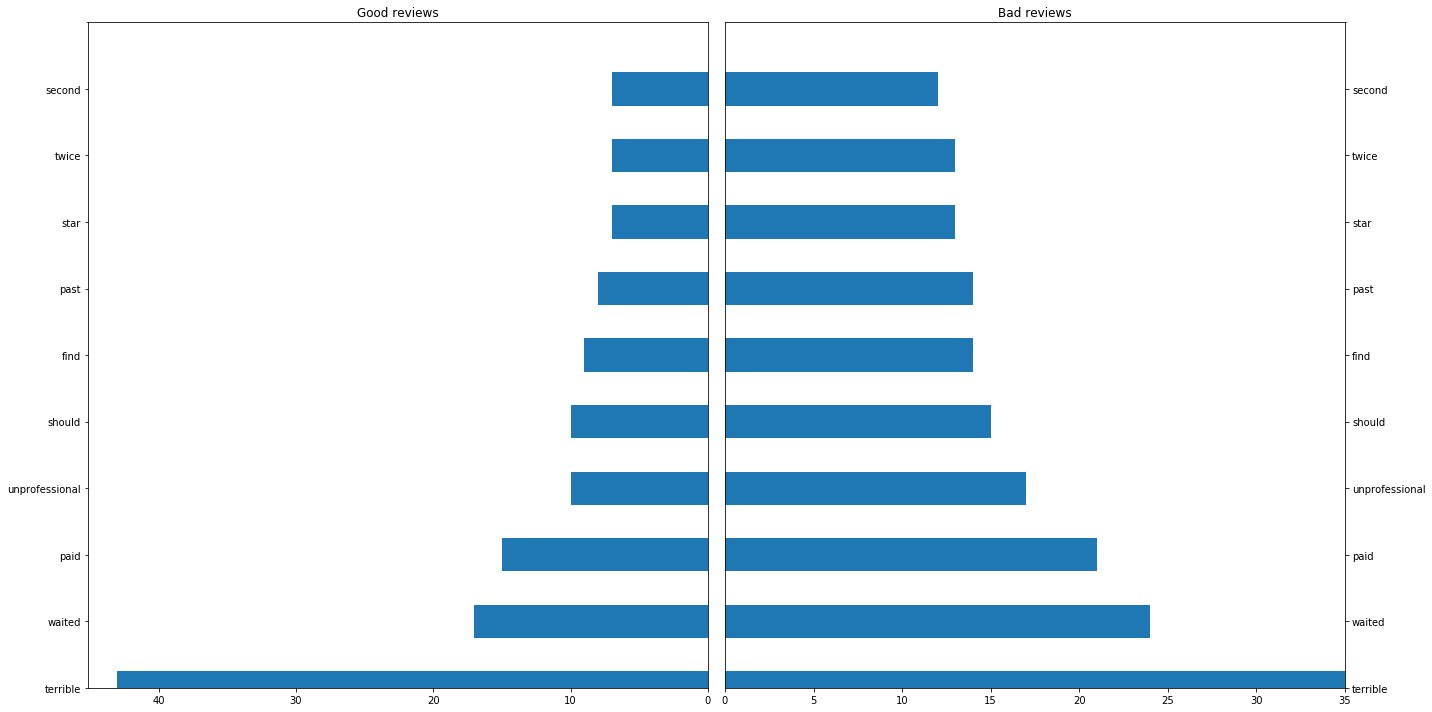

In [153]:
# set up fig,ax,ax sytanx
fig,(ax,ax1)=plt.subplots(ncols=2,sharey=True,figsize=[20,10])

graph_data=high_notin_low.value_counts()[:10]
graph_data.plot(kind='barh',ax=ax)
ax.invert_xaxis()

ax.set_title("Good reviews")

graph_data=low_notin_high.value_counts()[:10]
graph_data.plot(kind='barh',ax=ax1)
ax1.yaxis.set_ticks_position('right')
ax1.set_title("Bad reviews")

plt.ylim(0,10)
plt.xlim(0,35)
plt.tight_layout()
plt.show()

In [144]:
# original
print([x for x in ax.get_yticklabels()])
print([x for x in ax1.get_yticklabels()])


[Text(0, 0, 'amazing'), Text(0, 1, 'town'), Text(0, 2, 'helpful'), Text(0, 3, 'loved'), Text(0, 4, 'yum'), Text(0, 5, 'perfect'), Text(0, 6, 'outstanding'), Text(0, 7, 'spot'), Text(0, 8, 'cheesy'), Text(0, 9, 'wonderful')]
[Text(1, 0, 'terrible'), Text(1, 1, 'waited'), Text(1, 2, 'paid'), Text(1, 3, 'unprofessional'), Text(1, 4, 'should'), Text(1, 5, 'find'), Text(1, 6, 'past'), Text(1, 7, 'star'), Text(1, 8, 'twice'), Text(1, 9, 'second')]


In [152]:
# when i changed the 'good' ylabels last
print([x for x in ax.get_yticklabels()])
print([x for x in ax1.get_yticklabels()])

[Text(0, 0, 'amazing'), Text(0, 1, 'town'), Text(0, 2, 'helpful'), Text(0, 3, 'loved'), Text(0, 4, 'yum'), Text(0, 5, 'perfect'), Text(0, 6, 'outstanding'), Text(0, 7, 'spot'), Text(0, 8, 'cheesy'), Text(0, 9, 'wonderful')]
[Text(1, 0, 'amazing'), Text(1, 1, 'town'), Text(1, 2, 'helpful'), Text(1, 3, 'loved'), Text(1, 4, 'yum'), Text(1, 5, 'perfect'), Text(1, 6, 'outstanding'), Text(1, 7, 'spot'), Text(1, 8, 'cheesy'), Text(1, 9, 'wonderful')]


In [154]:
# when i changed the 'bad' ylabels last
print([x for x in ax.get_yticklabels()])
print([x for x in ax1.get_yticklabels()])

[Text(0, 0, 'terrible'), Text(0, 1, 'waited'), Text(0, 2, 'paid'), Text(0, 3, 'unprofessional'), Text(0, 4, 'should'), Text(0, 5, 'find'), Text(0, 6, 'past'), Text(0, 7, 'star'), Text(0, 8, 'twice'), Text(0, 9, 'second')]
[Text(1, 0, 'terrible'), Text(1, 1, 'waited'), Text(1, 2, 'paid'), Text(1, 3, 'unprofessional'), Text(1, 4, 'should'), Text(1, 5, 'find'), Text(1, 6, 'past'), Text(1, 7, 'star'), Text(1, 8, 'twice'), Text(1, 9, 'second')]


## data selection for plot two

In [159]:
df['store_name'].value_counts().sort_index()

Chanello's Pizza         85
Chanello's Pizza #1      87
Chanello's Pizza #10    120
Chanello's Pizza #11    148
Chanello's Pizza #13     80
Chanello's Pizza #14    101
Chanello's Pizza #18     91
Chanello's Pizza #19     68
Chanello's Pizza #2     116
Chanello's Pizza #26    141
Chanello's Pizza #3     143
Chanello's Pizza #32    101
Chanello's Pizza #33    124
Chanello's Pizza #4      83
Chanello's Pizza #5     156
Chanello's Pizza #6     111
Chanello's Pizza #7      62
Chanello's Pizza #8      64
Chanello's Pizza #9     207
Name: store_name, dtype: int64

In [158]:
df_high['store_name'].value_counts().sort_index()

Chanello's Pizza         52
Chanello's Pizza #1      59
Chanello's Pizza #10     74
Chanello's Pizza #11     92
Chanello's Pizza #13     62
Chanello's Pizza #14     42
Chanello's Pizza #18     59
Chanello's Pizza #19     50
Chanello's Pizza #2      58
Chanello's Pizza #26     60
Chanello's Pizza #3      89
Chanello's Pizza #32     58
Chanello's Pizza #33     59
Chanello's Pizza #4      61
Chanello's Pizza #5      86
Chanello's Pizza #6      71
Chanello's Pizza #7      40
Chanello's Pizza #8      37
Chanello's Pizza #9     115
Name: store_name, dtype: int64

In [160]:
df_low['store_name'].value_counts().sort_index()

Chanello's Pizza        26
Chanello's Pizza #1     24
Chanello's Pizza #10    29
Chanello's Pizza #11    48
Chanello's Pizza #13    15
Chanello's Pizza #14    46
Chanello's Pizza #18    30
Chanello's Pizza #19    11
Chanello's Pizza #2     50
Chanello's Pizza #26    66
Chanello's Pizza #3     38
Chanello's Pizza #32    32
Chanello's Pizza #33    47
Chanello's Pizza #4     15
Chanello's Pizza #5     59
Chanello's Pizza #6     29
Chanello's Pizza #7     20
Chanello's Pizza #8     21
Chanello's Pizza #9     68
Name: store_name, dtype: int64

In [172]:
def find_perc_whole(total,sample):
    a=(total-sample)/total
    return round(a*100,2)

for store in df['store_name'].value_counts().sort_index().index:
    good=df_high[df_high['store_name']==store].store_name.value_counts().values[0]
    bad=df_low[df_low['store_name']==store].store_name.value_counts().values[0]
    total=df[df['store_name']==store].store_name.value_counts().values[0]


In [176]:
44+67

111